### Step1.前置作業
#### 讀入標準套件


In [0]:
%matplotlib inline                

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [0]:
# 讀入Tensorflow
import tensorflow as tf 


### Step2. 讀入 MNSIT 數據集

In [0]:
from tensorflow.keras.datasets import fashion_mnist  #讀入Fashion 版的 MNIST

In [4]:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
#加入class_names

### Step3.欣賞數據集內容

In [6]:
len(x_train)

60000

In [7]:
len(x_test)

10000

In [0]:
x_train=x_train.reshape(60000,28,28,1)/255
#一個channel,所以(28,28)-->(28,28,1)
x_test=x_test.reshape(10000,28,28,1)/255

In [0]:
from tensorflow.keras.utils import to_categorical
#準備 One hot encoding

In [0]:
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

### 設計CNN
#### 1.filter大小通常為基數的矩陣，於是我們在這裡設計為5x5
#### 2.filter的個數會隨層數會越來越多，因為要篩的東西越來越多
#### 3.最後的輸出會是多記分板的樣子，我們要做flaten(拉平)的樣子



### 讀入必要的函式↓

In [0]:
from tensorflow.keras.models import Sequential   #開空白的函數學習機
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.layers import Dense,Flatten  #把記分板拉平
from tensorflow.keras.optimizers import SGD

### Step1.打造函數學習機(CNN)

In [0]:
model=Sequential()

In [0]:
model.add(Conv2D(16,(5,5),padding="same",
                input_shape=(28,28,1),
                activation='relu'))  

#個數16,大小5x5,填充(padding)方式選擇使用"same
#輸出16個28X28矩陣
#事實上是(28,28,16)
#使用"relu"作為激活函數

In [0]:
model.add(MaxPooling2D(pool_size=(2,2)))


#應該要變成(14,14,16)

In [0]:
model.add(Conv2D(32,(5,5),padding="same",
                 activation="relu"))

In [0]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [0]:
model.add(Conv2D(64,(5,5),padding="same",
                 activation='relu'))

In [0]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [0]:
model.add(Flatten())

In [0]:
model.add(Dense(99,activation='relu'))
#將神經元總數改為99個

In [0]:
model.add(Dense(10,activation='softmax')) 
#softmax讓他加起來等於1

### 看一下我們的神經網路

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        12832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 576)               0

In [0]:
model.compile(loss='mse',optimizer=SGD(lr=0.09),
              metrics=['accuracy'])

#learning rate=0.09
#設置metrics告訴我們正確率

### Step2.fit

In [24]:
model.fit(x_train,y_train,batch_size=64,epochs=10)
#每次訓練資料為64筆,總共訓練10次
#正確率為0.8614
#其實前面有先跑過大概兩三次，但是正確率低的很可憐(但code不小心被我手殘刪了QAQ)

Epoch 1/10
938/938 [==============================] - 85s 91ms/step - loss: 0.0756 - accuracy: 0.3750
Epoch 2/10
938/938 [==============================] - 85s 90ms/step - loss: 0.0379 - accuracy: 0.7279
Epoch 3/10
938/938 [==============================] - 85s 90ms/step - loss: 0.0316 - accuracy: 0.7780
Epoch 4/10
938/938 [==============================] - 85s 90ms/step - loss: 0.0285 - accuracy: 0.8015
Epoch 5/10
938/938 [==============================] - 87s 93ms/step - loss: 0.0264 - accuracy: 0.8171
Epoch 6/10
938/938 [==============================] - 86s 91ms/step - loss: 0.0246 - accuracy: 0.8300
Epoch 7/10
938/938 [==============================] - 86s 91ms/step - loss: 0.0232 - accuracy: 0.8399
Epoch 8/10
938/938 [==============================] - 86s 92ms/step - loss: 0.0222 - accuracy: 0.8468
Epoch 9/10
938/938 [==============================] - 86s 91ms/step - loss: 0.0212 - accuracy: 0.8537
Epoch 10/10
938/938 [==============================] - 85s 91ms/step - loss: 0.020

In [25]:
model.fit(x_train,y_train,batch_size=64,epochs=10)
#想提升正確率，再跑一次

Epoch 1/10
938/938 [==============================] - 84s 90ms/step - loss: 0.0197 - accuracy: 0.8655
Epoch 2/10
938/938 [==============================] - 84s 90ms/step - loss: 0.0191 - accuracy: 0.8697
Epoch 3/10
938/938 [==============================] - 85s 90ms/step - loss: 0.0186 - accuracy: 0.8729
Epoch 4/10
938/938 [==============================] - 84s 90ms/step - loss: 0.0181 - accuracy: 0.8771
Epoch 5/10
938/938 [==============================] - 84s 90ms/step - loss: 0.0178 - accuracy: 0.8798
Epoch 6/10
938/938 [==============================] - 84s 90ms/step - loss: 0.0173 - accuracy: 0.8831
Epoch 7/10
938/938 [==============================] - 84s 90ms/step - loss: 0.0170 - accuracy: 0.8853
Epoch 8/10
938/938 [==============================] - 84s 90ms/step - loss: 0.0167 - accuracy: 0.8877
Epoch 9/10
938/938 [==============================] - 84s 90ms/step - loss: 0.0164 - accuracy: 0.8892
Epoch 10/10
938/938 [==============================] - 84s 90ms/step - loss: 0.016

In [27]:
model.fit(x_train,y_train,batch_size=64,epochs=10)
#想提升正確率，再跑一次
#很棒，終於有0.9以上了。
#衝正確率在0.9106

Epoch 1/10
938/938 [==============================] - 84s 90ms/step - loss: 0.0139 - accuracy: 0.9071
Epoch 2/10
938/938 [==============================] - 84s 90ms/step - loss: 0.0137 - accuracy: 0.9090
Epoch 3/10
938/938 [==============================] - 85s 91ms/step - loss: 0.0136 - accuracy: 0.9099
Epoch 4/10
938/938 [==============================] - 85s 90ms/step - loss: 0.0134 - accuracy: 0.9111
Epoch 5/10
938/938 [==============================] - 85s 91ms/step - loss: 0.0132 - accuracy: 0.9137
Epoch 6/10
938/938 [==============================] - 85s 90ms/step - loss: 0.0131 - accuracy: 0.9137
Epoch 7/10
938/938 [==============================] - 85s 90ms/step - loss: 0.0130 - accuracy: 0.9140
Epoch 8/10
938/938 [==============================] - 86s 92ms/step - loss: 0.0128 - accuracy: 0.9149
Epoch 9/10
938/938 [==============================] - 85s 90ms/step - loss: 0.0127 - accuracy: 0.9178
Epoch 10/10
938/938 [==============================] - 85s 90ms/step - loss: 0.012

### Step3.預測

In [28]:
result=model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [0]:
def my_predict(n):
  print('我可愛的CNN預測是',class_names[result[n]])
  X=x_test[n].reshape(28,28)
  plt.imshow(X,cmap='RdPu')

#自定義一個函數來看結果
#選擇用紫色(RdPu)呈現

我可愛的CNN預測是 Pullover


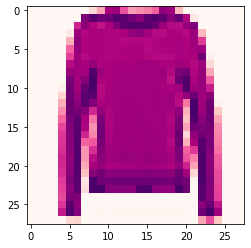

In [34]:
my_predict(99)

In [0]:
from ipywidgets import interact_manual

In [37]:
interact_manual(my_predict, n=(0, 9999))

interactive(children=(IntSlider(value=4999, description='n', max=9999), Button(description='Run Interact', sty…

<function __main__.my_predict>

### Step 4.模型評估

In [38]:
score = model.evaluate(x_test, y_test)

313/313 [==============================] - 5s 15ms/step - loss: 0.0158 - accuracy: 0.8929


In [0]:
los,acc=score

In [40]:
print('測試資料正確率為',acc)

測試資料正確率為 0.8928999900817871
